# 决策树

In [18]:
# 导包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree

## 获取数据

In [25]:
# 从本地文件读取泰坦尼克号数据
titanic_data = pd.read_csv(r'C:\Users\19942\Desktop\wangdao\code\python_ml\data\titanic.txt')

# 查看前几行数据
print("泰坦尼克号数据集前5行: ")
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
print(titanic_data.head())

泰坦尼克号数据集前5行: 
   row.names pclass  survived  \
0          1    1st         1   
1          2    1st         0   
2          3    1st         0   
3          4    1st         0   
4          5    1st         1   

                                              name      age     embarked  \
0                     Allen, Miss Elisabeth Walton  29.0000  Southampton   
1                      Allison, Miss Helen Loraine   2.0000  Southampton   
2              Allison, Mr Hudson Joshua Creighton  30.0000  Southampton   
3  Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)  25.0000  Southampton   
4                    Allison, Master Hudson Trevor   0.9167  Southampton   

                         home.dest room      ticket   boat     sex  
0                     St Louis, MO  B-5  24160 L221      2  female  
1  Montreal, PQ / Chesterville, ON  C26         NaN    NaN  female  
2  Montreal, PQ / Chesterville, ON  C26         NaN  (135)    male  
3  Montreal, PQ / Chesterville, ON  C26         NaN   

## 数据预处理

In [26]:
# 字段： rowname  pclass  survived  name embarked age home room ticket boat sex
# 根据判断，标签为是否存活 ， 影响存活率的因素主要是 pclass、age、sex


# 提取需要分析的列：pclass, age, sex 和 survived
titanic_subset = titanic_data[['pclass', 'age', 'sex', 'survived']].copy()  # 使用.copy()创建真实副本而非视图

# 检查缺失值
print("\n各列缺失值数量：")
print(titanic_subset.isnull().sum())


各列缺失值数量：
pclass        0
age         680
sex           0
survived      0
dtype: int64


In [27]:
# 处理缺失值 - 对于年龄，使用平均值来进行 fillna
titanic_subset['age'] = titanic_subset['age'].fillna(titanic_subset['age'].mean())


# 分析乘客等级(pclass)对生存率的影响 | 分析各等级生存率的平均值
print("\n不同乘客等级的生存率：")
pclass_survival = titanic_subset.groupby('pclass')['survived'].mean()
print(pclass_survival)


# 分析性别(sex)对生存率的影响
print("\n不同性别的生存率：")
sex_survival = titanic_subset.groupby('sex')['survived'].mean()
print(sex_survival)


# 分析年龄(age)对生存率的影响
print("\n不同年龄组的生存率：")
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]     
titanic_subset['age_group'] = pd.cut(titanic_subset['age'], bins=age_bins)
age_survival = titanic_subset.groupby('age_group', observed=False)['survived'].mean()
print(age_survival)



# 将性别转换为数值
titanic_subset['sex'] = titanic_subset['sex'].map({'male': 0, 'female': 1})

# 删除age_group列，因为我们已经有了age列
if 'age_group' in titanic_subset.columns:
    titanic_subset = titanic_subset.drop('age_group', axis=1)

# 删除含有缺失值的行
titanic_clean = titanic_subset.dropna()


# 将pclass 用 map 映射为数值类型
X = titanic_clean.copy()
X['pclass'] = X['pclass'].map({'1st': 1, '2nd': 2, '3rd': 3})
X = X[['pclass', 'age', 'sex']]
y = titanic_clean['survived']


不同乘客等级的生存率：
pclass
1st    0.599379
2nd    0.425000
3rd    0.192686
Name: survived, dtype: float64

不同性别的生存率：
sex
female    0.663067
male      0.167059
Name: survived, dtype: float64

不同年龄组的生存率：
age_group
(0, 10]     0.702128
(10, 20]    0.469388
(20, 30]    0.355330
(30, 40]    0.283951
(40, 50]    0.451613
(50, 60]    0.510638
(60, 70]    0.222222
(70, 80]    0.000000
(80, 90]         NaN
Name: survived, dtype: float64


# 训练、评估模型


X_train中男性和女性的数量统计：
男性的数量：663，女性的数量：321

决策树模型准确率：0.8389

分类报告：


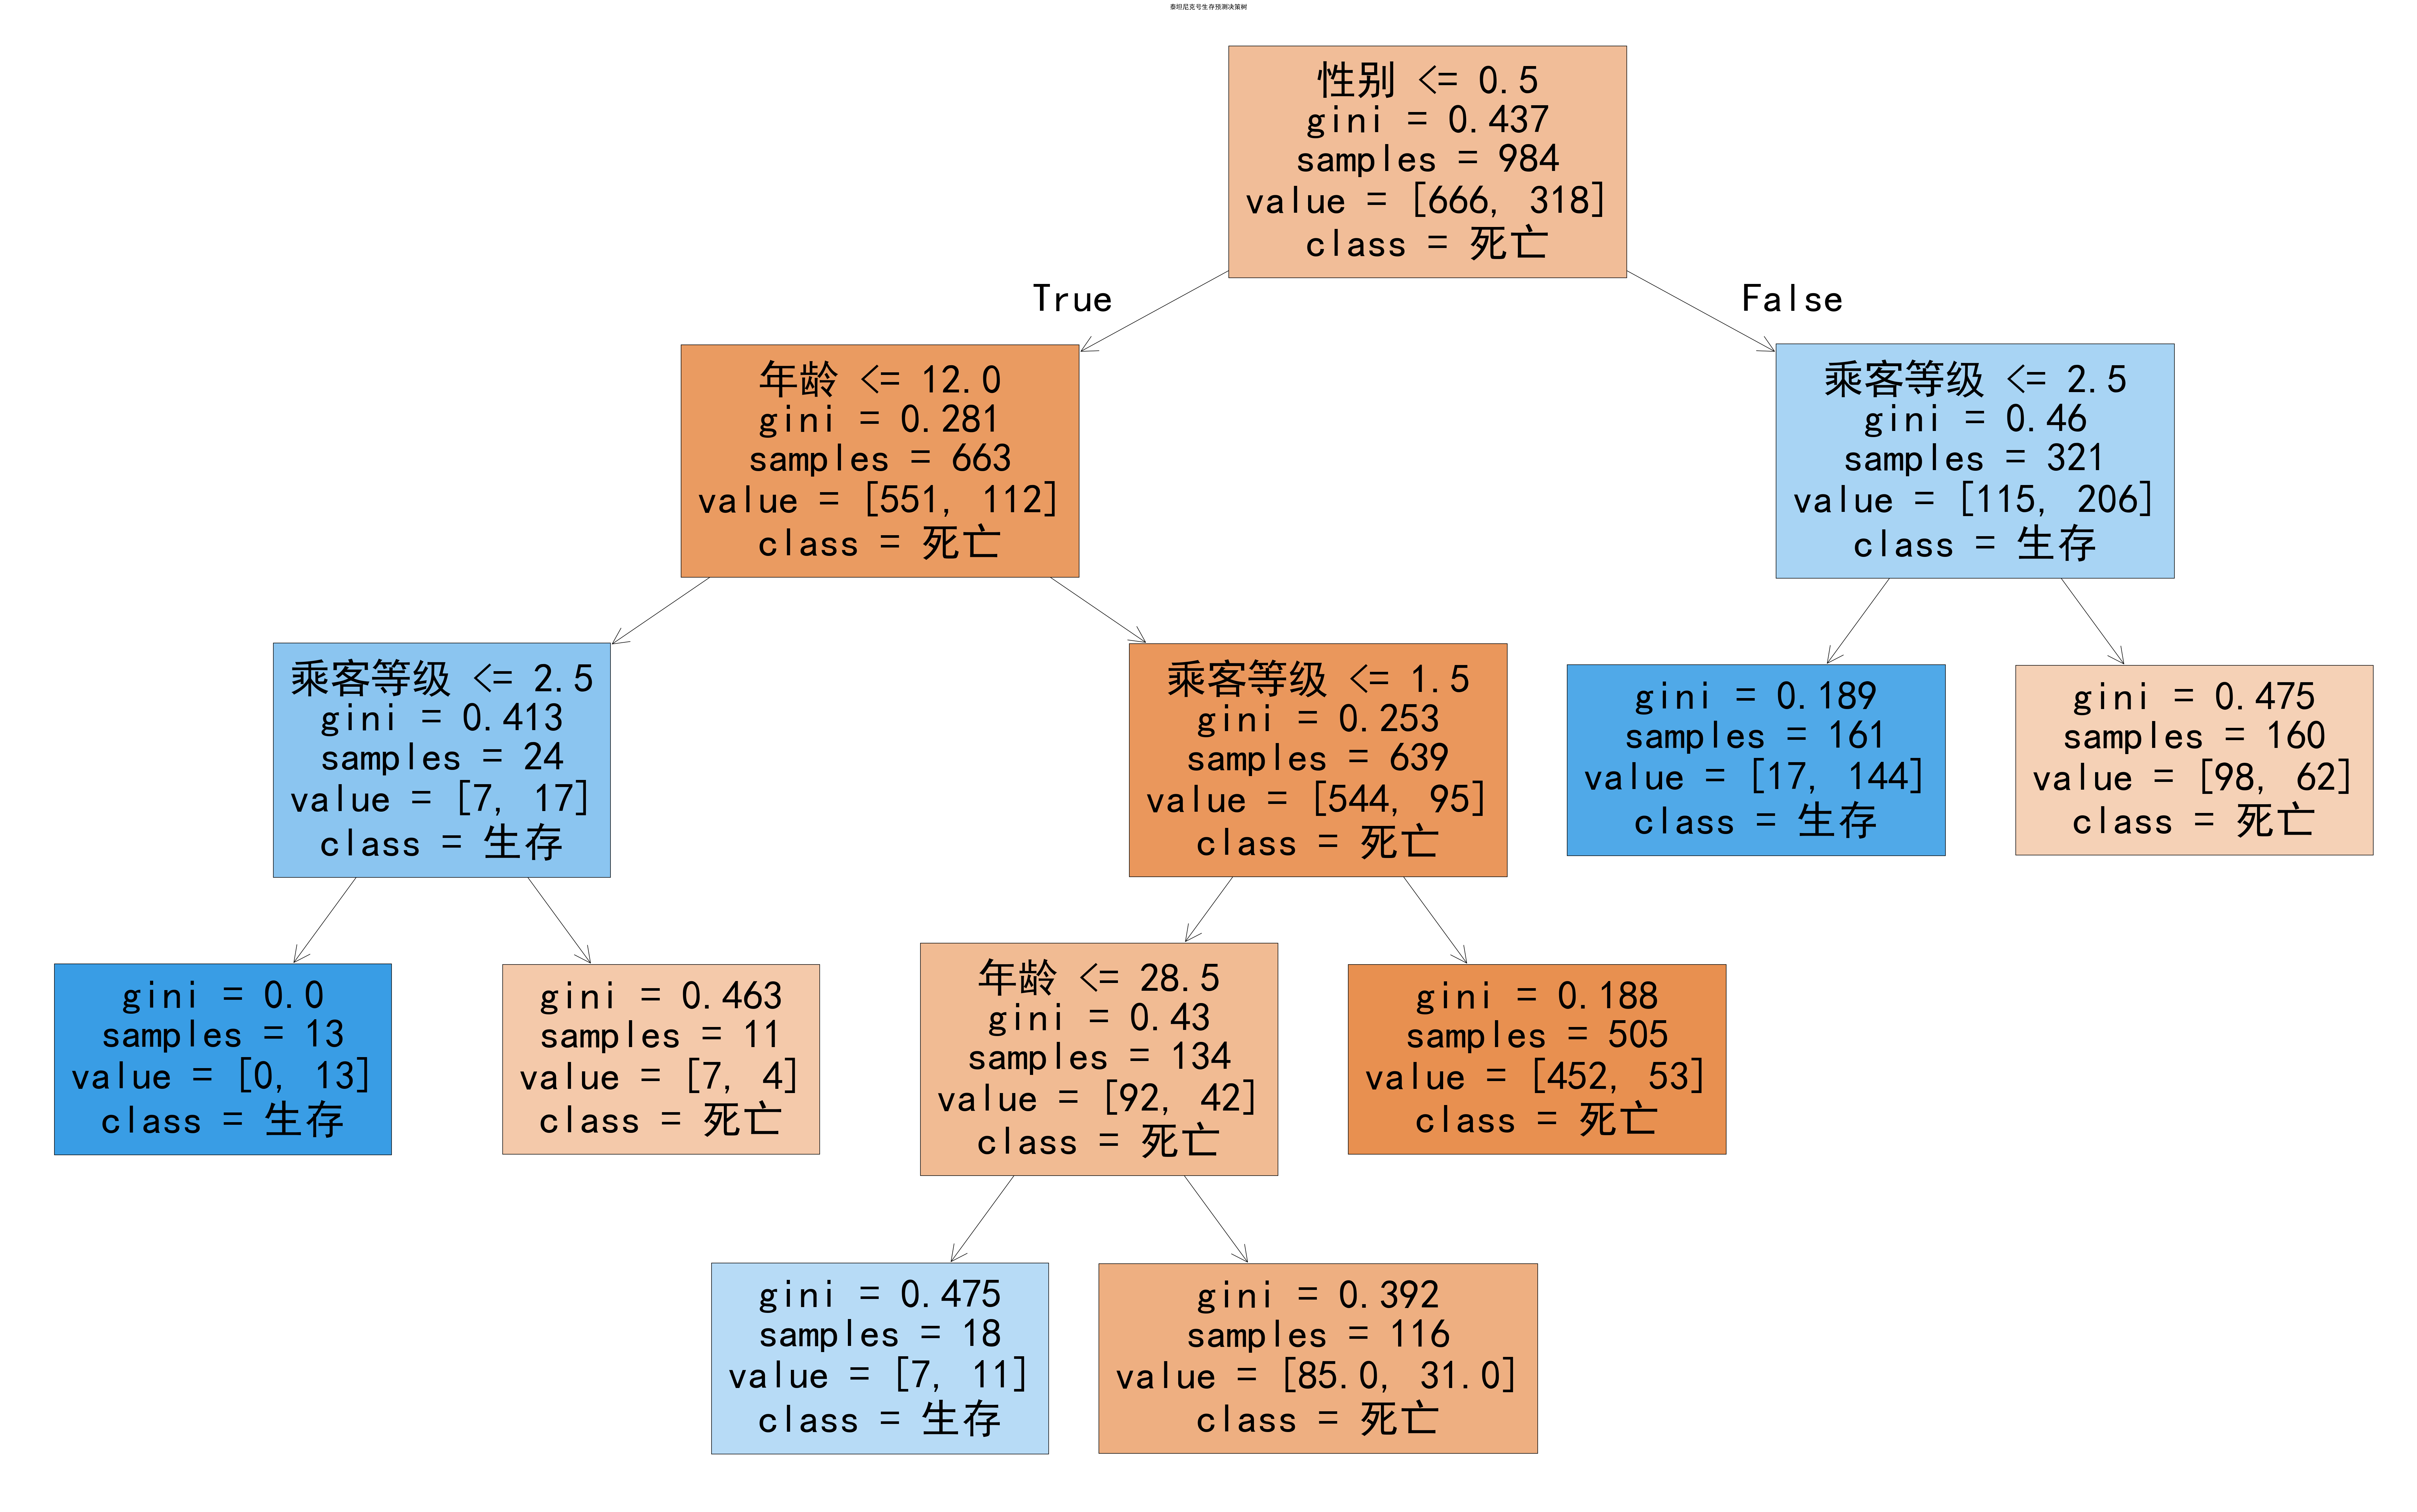


特征重要性：
       特征       重要性
2     sex  0.568333
0  pclass  0.324847
1     age  0.106820


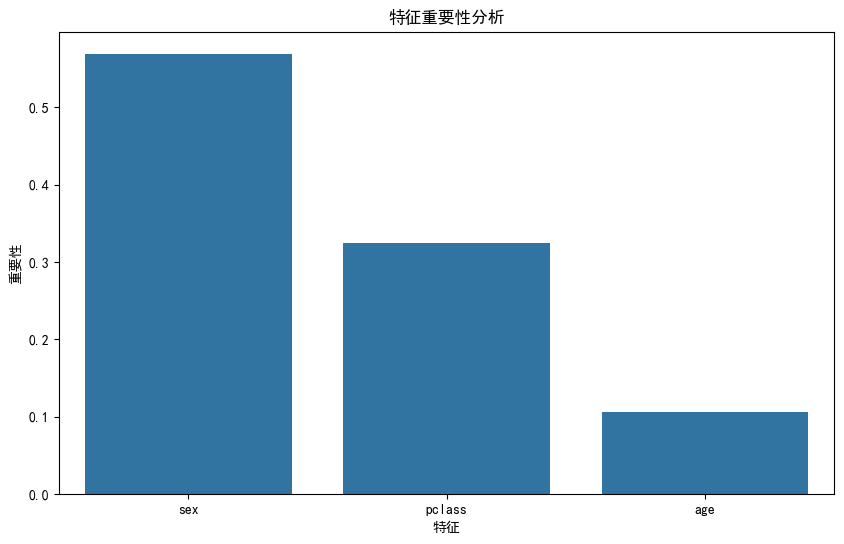


结论：
1. 乘客等级(pclass)：较高等级的乘客(如一等舱)生存率明显高于低等级
2. 性别(sex)：女性生存率显著高于男性，体现了'女士优先'的救生原则
3. 年龄(age)：儿童的生存率相对较高，而中年和老年人的生存率较低
4. 根据特征重要性分析，性别是影响生存最重要的因素，其次是乘客等级和年龄


In [30]:
# 将pclass转换为数值类型
X = titanic_clean.copy()
X['pclass'] = X['pclass'].map({'1st': 1, '2nd': 2, '3rd': 3})
X = X[['pclass', 'age', 'sex']]
y = titanic_clean['survived']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# 训练决策树模型
dt_model = DecisionTreeClassifier(min_impurity_decrease=0.003)
dt_model.fit(X_train, y_train)
# 统计X_train中男性和女性的数量
print("\nX_train中男性和女性的数量统计：")
sex_counts_train = X_train['sex'].value_counts()
print(f'男性的数量：{sex_counts_train[0]}，女性的数量：{sex_counts_train[1]}')

# 在测试集上评估模型
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n决策树模型准确率：{accuracy:.4f}")
print("\n分类报告：")


# 可视化决策树
plt.figure(figsize=(80, 50),dpi=120)
plot_tree(dt_model, filled=True, feature_names=['乘客等级', '年龄', '性别'], class_names=['死亡', '生存'])
plt.title('泰坦尼克号生存预测决策树')
plt.show()




# 计算特征重要性
feature_importance = pd.DataFrame({
    '特征': X.columns,
    '重要性': dt_model.feature_importances_
})
feature_importance = feature_importance.sort_values('重要性', ascending=False)
print("\n特征重要性：")
print(feature_importance)

plt.figure(figsize=(10, 6))
sns.barplot(x='特征', y='重要性', data=feature_importance)
plt.title('特征重要性分析')
plt.show()

print("\n结论：")
print("1. 乘客等级(pclass)：较高等级的乘客(如一等舱)生存率明显高于低等级")
print("2. 性别(sex)：女性生存率显著高于男性，体现了'女士优先'的救生原则")
print("3. 年龄(age)：儿童的生存率相对较高，而中年和老年人的生存率较低")
print("4. 根据特征重要性分析，性别是影响生存最重要的因素，其次是乘客等级和年龄")